<a href="https://colab.research.google.com/github/gbrsantos/machine-learning-service/blob/main/LoanML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  MVP da disciplina de Engenharia de Sistemas de Software Inteligentes -
# Gabriel Santos Nascimento


In [50]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

## Carga do Dataset

In [51]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/gbrsantos/datascience/main/bankloan.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# Mostra as primeiras 10 linhas do dataset
dataset.head(10)

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


## Separação em conjunto de treino e conjunto de teste com holdout

In [52]:
# Removendo as colunas que não tem impacto na análise e a coluna de saída
X = dataset.drop(['ZIP.Code','Personal.Loan', 'ID'], axis=1)

# Coluna de saída
y = dataset['Personal.Loan']

In [53]:
test_size = 0.2 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Divisão em conjunto de treinamento e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= test_size, random_state=42)

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

## Modelagem e Inferência

### Criação e avaliação de modelos: linha base

KNN: 0.909250 (0.011992)
CART: 0.982500 (0.004031)
NB: 0.881250 (0.013428)
SVM: 0.909000 (0.005937)


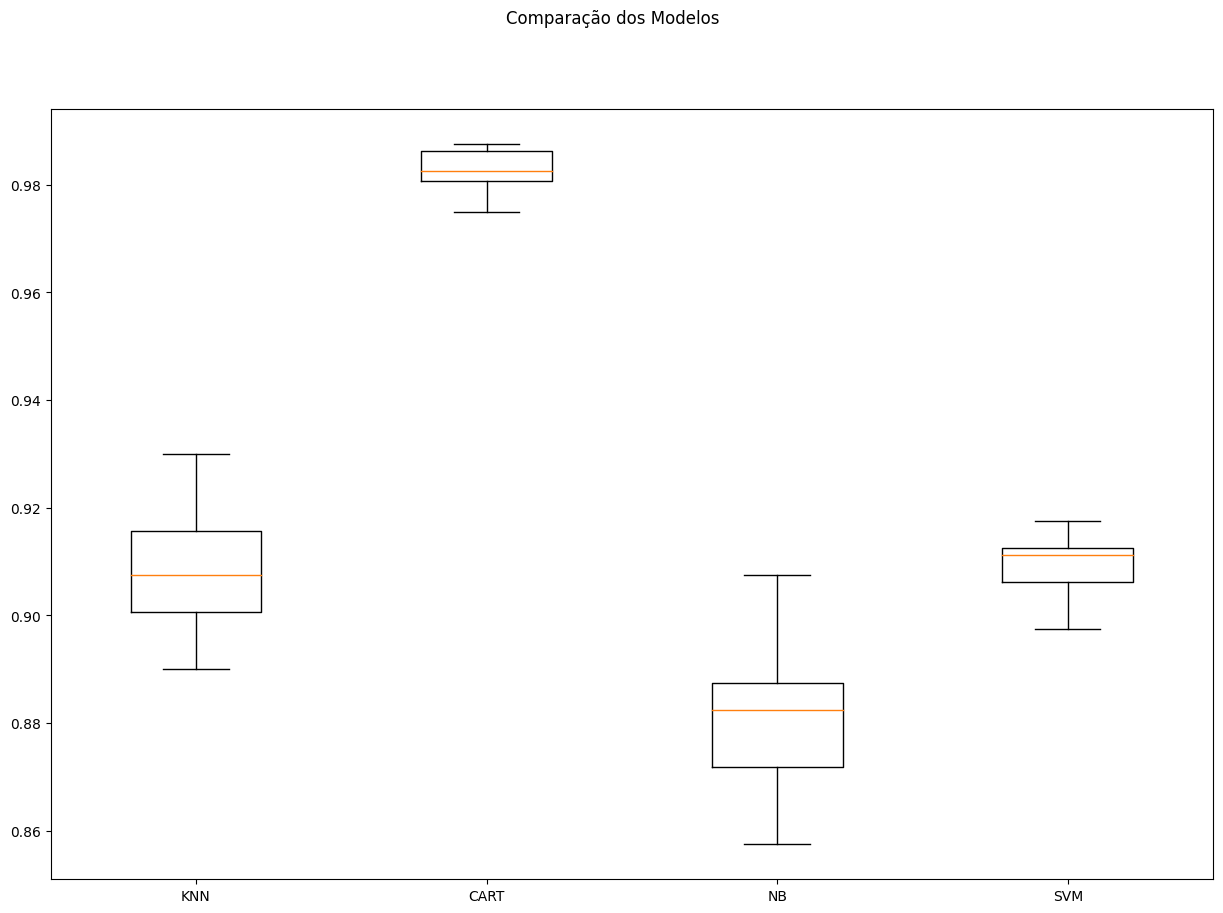

In [54]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados

KNN-orig: 0.909 (0.012)
CART-orig: 0.983 (0.004)
NB-orig: 0.881 (0.013)
SVM-orig: 0.909 (0.006)
KNN-padr: 0.958 (0.012)
CART-padr: 0.983 (0.003)
NB-padr: 0.881 (0.013)
SVM-padr: 0.974 (0.005)
KNN-norm: 0.956 (0.008)
CART-norm: 0.981 (0.005)
NB-norm: 0.881 (0.013)
SVM-norm: 0.972 (0.008)


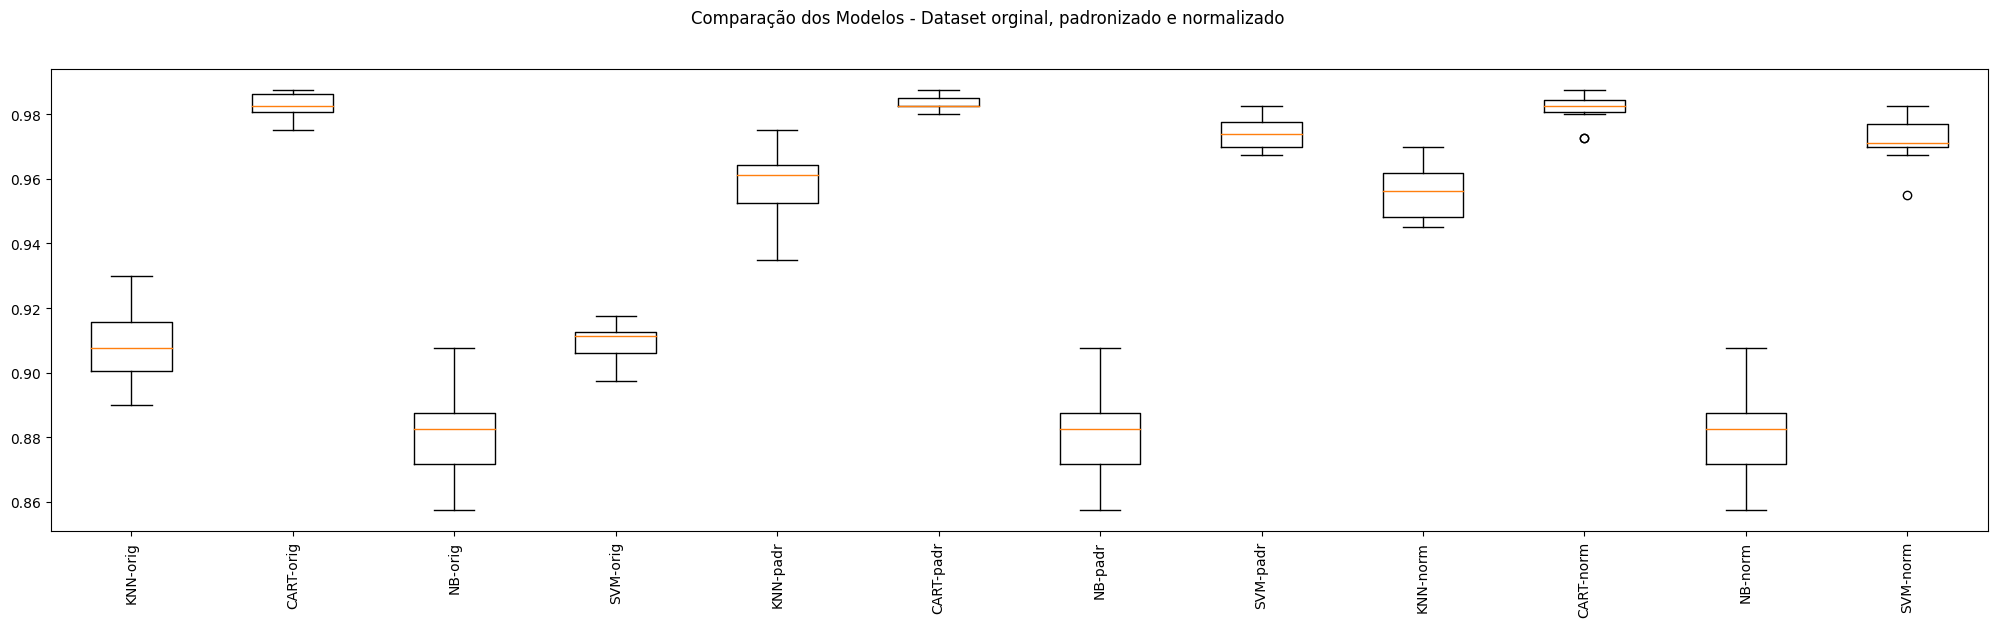

In [55]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização dos hiperparâmetros

In [57]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)

    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.924750 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 7}
Sem tratamento de missings: knn-padr - Melhor: 0.960250 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 1}
Sem tratamento de missings: knn-norm - Melhor: 0.962750 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 1}


## Finalização do Modelo

In [58]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = KNeighborsClassifier(metric='euclidean', n_neighbors=1)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.96


In [59]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

## Simulando a aplicação do modelo em dados não vistos

In [63]:
# Novos dados - não sabemos a classe!
data = {
    'Age': [34, 42, 30],
    'Experience': [9, 12, 12],
    'Income': [180, 30, 75],
    'Zip.Code': [1234, 12345, 123456],
    'Family': [1, 2, 2],
    'CCAvg': [8.9, 1, 0.3],
    'Education': [2, 2, 3],
    'Mortgage': [0, 150, 0],
    'Securities.Account': [0, 1, 0],
    'CD.Account': [0, 0, 0],
    'Online': [0, 0, 1],
    'CreditCard': [0, 0, 1],
}

atributos = ['Age', 'Experience', 'Income', 'Zip.Code','Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities.Account',
       'CD.Account', 'Online', 'CreditCard']

entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:11].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[-9.89214880e-01 -9.68412581e-01  1.65603406e+00  1.07324775e+03
  -5.36736182e-01  8.35809074e+00 -5.35858945e-01 -3.41423340e-01
  -2.53540280e-01 -1.21661774e+00 -6.45314338e-01]
 [-2.91257581e-01 -7.06787872e-01 -9.51010894e-01  1.07556291e+04
   3.55150563e-02 -1.04907792e+00 -5.35858945e-01  4.90209353e+02
   3.94414647e+00 -1.21661774e+00 -6.45314338e-01]
 [-1.33819353e+00 -7.06787872e-01  2.66309642e-02  1.07580314e+05
   3.55150563e-02 -1.88262451e+00 -5.26026454e-01 -3.41423340e-01
  -2.53540280e-01 -1.21661774e+00  1.54963239e+00]]


In [64]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[1 0 0]


## Conclusão

Com base nos dados apresentados, foi possível obter uma precisão de quase 96% utilizando o algoritmo KNN (vizinho mais próximo). Além disso, no estudo, foram alcançadas porcentagens ainda mais elevadas, como no caso do algoritmo CART (Árvore de Decisão), que obteve cerca de 99% de precisão.
Exemplo:

```
Sem tratamento de missings: cart-norm - Melhor: 0.987500 usando
  {
   "CART_criterion":"entropy",
   "CARTmax_depth":"None",
  "CARTmin_samples_leaf":1,
   "CART_min_samples_split":2
  }
```
  
Porém, como o projeto foi desenvolvido de maneira sincrona, em que o usuário espera o processamento do dataset, o algoritmo KNN demonstrou um desempenho superior quando comparado à relação entre tempo de processamento e precisão. Consequentemente, foi utilizado para a solução. Isso significa que, através dos dados fornecidos, o usuário tem como saber, de uma forma confiável e rápida, se o empréstimo deve ser ou não concedido.